In [5]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


In [11]:
df = pd.read_csv('df_preprocessed.csv')
df.head()
x = df.drop(['DEP_DELAY'], axis=1)
y = df['DEP_DELAY']

If delay is more than 15 minutes, it is considered as delayed
1 ->delayed
0 ->not delayed

In [17]:
df['DEP_DELAY'].value_counts()

0    24946
1     3874
Name: DEP_DELAY, dtype: int64

PCA

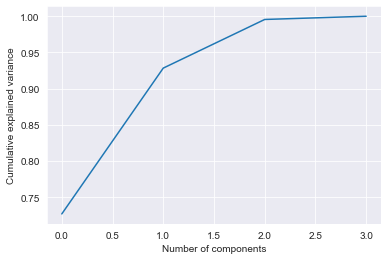

In [18]:
pca = PCA()
pca.fit(x)
cumsum = np.cumsum(pca.explained_variance_ratio_)
plt.plot(cumsum)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

In [19]:
print(x.shape)
print(type(x))

(28820, 4)
<class 'numpy.ndarray'>


Taking 4 components

<class 'numpy.ndarray'> <class 'pandas.core.series.Series'> <class 'numpy.ndarray'> <class 'pandas.core.series.Series'>
torch.Size([5764, 4]) torch.Size([5764, 1]) torch.Size([23056, 4]) torch.Size([23056, 1])
Epoch [1/50], Loss: 1.4931
Epoch [2/50], Loss: 0.8478
Epoch [3/50], Loss: 0.6542
Epoch [4/50], Loss: 0.6002
Epoch [5/50], Loss: 0.5663
Epoch [6/50], Loss: 0.5429
Epoch [7/50], Loss: 0.5244
Epoch [8/50], Loss: 0.5094
Epoch [9/50], Loss: 0.4973
Epoch [10/50], Loss: 0.4877
Epoch [11/50], Loss: 0.4801
Epoch [12/50], Loss: 0.4739
Epoch [13/50], Loss: 0.4685
Epoch [14/50], Loss: 0.4634
Epoch [15/50], Loss: 0.4585
Epoch [16/50], Loss: 0.4533
Epoch [17/50], Loss: 0.4485
Epoch [18/50], Loss: 0.4444
Epoch [19/50], Loss: 0.4413
Epoch [20/50], Loss: 0.4387
Epoch [21/50], Loss: 0.4363
Epoch [22/50], Loss: 0.4343
Epoch [23/50], Loss: 0.4326
Epoch [24/50], Loss: 0.4308
Epoch [25/50], Loss: 0.4293
Epoch [26/50], Loss: 0.4277
Epoch [27/50], Loss: 0.4264
Epoch [28/50], Loss: 0.4251
Epoch [29/50], 

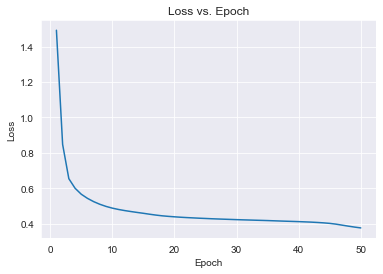

In [20]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split


pca = PCA(n_components=4)
x = pca.fit_transform(x)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
# change to numpy
print(type(X_train), type(y_train), type(X_test), type(y_test))
# chnage to tensor
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()
X_train = torch.from_numpy(X_train).float()
X_test = torch.from_numpy(X_test).float()
y_test = torch.from_numpy(y_test).float().view(-1, 1)

y_train = torch.from_numpy(y_train).float().view(-1, 1)

print(X_test.shape, y_test.shape, X_train.shape, y_train.shape)

# Define the neural network model
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_size):
        super(LogisticRegressionModel, self).__init__()
        self.fc1 = nn.Linear(input_size, 16)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(16, 4)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(4, 1)
        self.sigmoid = nn.Sigmoid()  # Sigmoid activation for binary classification

    def forward(self, x):
        x = self.relu1(self.fc1(x))
        x = self.relu2(self.fc2(x))
        x = self.fc3(x)
        x = self.sigmoid(x)  # Apply sigmoid activation for binary classification
        return x

# Initialize the model
model = LogisticRegressionModel(input_size=4)

# Define loss function and optimizer
criterion = nn.BCELoss()  # Binary Cross-Entropy loss for binary classification
optimizer = optim.SGD(model.parameters(), lr=1e-5)  # Stochastic Gradient Descent

# Prepare data using DataLoader
batch_size = 16
dataset = TensorDataset(X_train, y_train)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Training loop
num_epochs = 50
losses = []

for epoch in range(num_epochs):
    epoch_loss = 0.0

    for batch_x, batch_y in dataloader:
        # Forward pass
        outputs = model(batch_x)

        # Compute the binary cross-entropy loss
        loss = criterion(outputs, batch_y)
        epoch_loss += loss.item()

        # Backpropagation and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Append the average loss for this epoch to the list
    losses.append(epoch_loss / len(dataloader))

    # Print the loss at the end of each epoch
    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {losses[-1]:.4f}')

# Print the final learned parameters
for name, param in model.named_parameters():
    if param.requires_grad:
        print(f'{name}: {param.data}')

# Optionally, plot the loss versus epoch
import matplotlib.pyplot as plt
plt.plot(range(1, num_epochs + 1), losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs. Epoch')
plt.grid(True)
plt.show()


In [23]:
# save this model criterion and optimizer
# torch.save({
#             'epoch': num_epochs,
#             'model_state_dict': model.state_dict(),
#             'optimizer_state_dict': optimizer.state_dict(),
#             'loss': criterion,
#             }, "model.pt")

torch.save(model.state_dict(), 'model.pt')
# save the optimizer
torch.save(optimizer.state_dict(), 'optimizer.pt')
# save the criterion
torch.save(criterion.state_dict(), 'criterion.pt')
